# Research Software Engineering Individual Project

## Dataset Description

The dataset titled [Consumer price index: Germany, years, classification of uses of individual consumption](https://www-genesis.destatis.de/genesis//online?operation=table&code=61111-0003&bypass=true&levelindex=0&levelid=1713996336773#abreadcrumb) presents **Consumer Price Index (CPI)** in Germany, spanning from **2019 to 2023**, with the base year being **2020**. Here are the key points:

- **COICOP Hierarchy**: The data is organized according to the Classification of Individual Consumption by Purpose (COICOP) at 2-5-digit levels.
- **Time Frame**: The data spans from 2019 to 2023, allowing for a comparison of price changes over these years.
- **Categories**: It includes a wide range of consumer goods, including food, beverages, tobacco, clothing, footwear etc.

This dataset serves as a valuable resource for economists, researchers, and policy makers interested in analyzing inflation trends and consumption behaviors in Germany.

### Classification of Individual Consumption According to Purpose (COICOP)

The **Classification of Individual Consumption According to Purpose (COICOP)** is a reference classification published by the United Nations Statistics Division. It's used to classify and analyze individual consumption expenditures incurred by households, non-profit institutions serving households, and general government.

#### COICOP Hierarchy

The COICOP hierarchy is structured into four levels:

1. **Divisions (two-digit)**: These are broad categories like food and non-alcoholic beverages, clothing and footwear, housing, etc.
2. **Groups (three-digit)**: These are subcategories within each division. For example, under the division of food and non-alcoholic beverages, there could be groups like food, non-alcoholic beverages, etc.
3. **Classes (four-digit)**: These are further subdivisions within each group.
4. **Subclasses (five-digit)**: These are the most specific categories within each class.

Each level provides more detailed information about the consumption expenditures. 


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import re

## Loading data

In [2]:
# Skipping first 7 and last 3 rows as they do not contain real data
df = pd.read_csv(
    "../data/61111-0003_F.csv",
    sep=";",
    encoding="ISO-8859-1",
    skiprows=7,
    skipfooter=3,
    engine="python",
    names=[
        "consumption_code",
        "consumption_label",
        "2019",
        "2020",
        "2021",
        "2022",
        "2023",
    ],
)

In [3]:
df.head()

,consumption_code,consumption_label,2019,2020,2021,2022,2023
0,CC13-01,Food and non-alcoholic beverages,97.9,100.0,103.1,116.0,130.3
1,CC13-011,Food,97.8,100.0,103.1,116.9,131.4
2,CC13-0111,Bread and cereals,99.2,100.0,103.3,116.8,135.9
3,CC13-01111,"Rice, including rice preparations",98.7,100.0,102.6,115.7,135.5
4,CC13-01112,Flour and other cereals,100.2,100.0,104.1,134.2,157.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   consumption_code   441 non-null    object
 1   consumption_label  441 non-null    object
 2   2019               441 non-null    object
 3   2020               441 non-null    object
 4   2021               441 non-null    object
 5   2022               441 non-null    object
 6   2023               441 non-null    object
dtypes: object(7)
memory usage: 24.2+ KB


## Data Cleaning

In [5]:
# Replace '-' with 0.0
df = df.replace("-", 0.0)
# Replace '.' with 0.0
df = df.replace(".", 0.0)

## Research Questions

### 1. How have item prices evolved over the last five years?

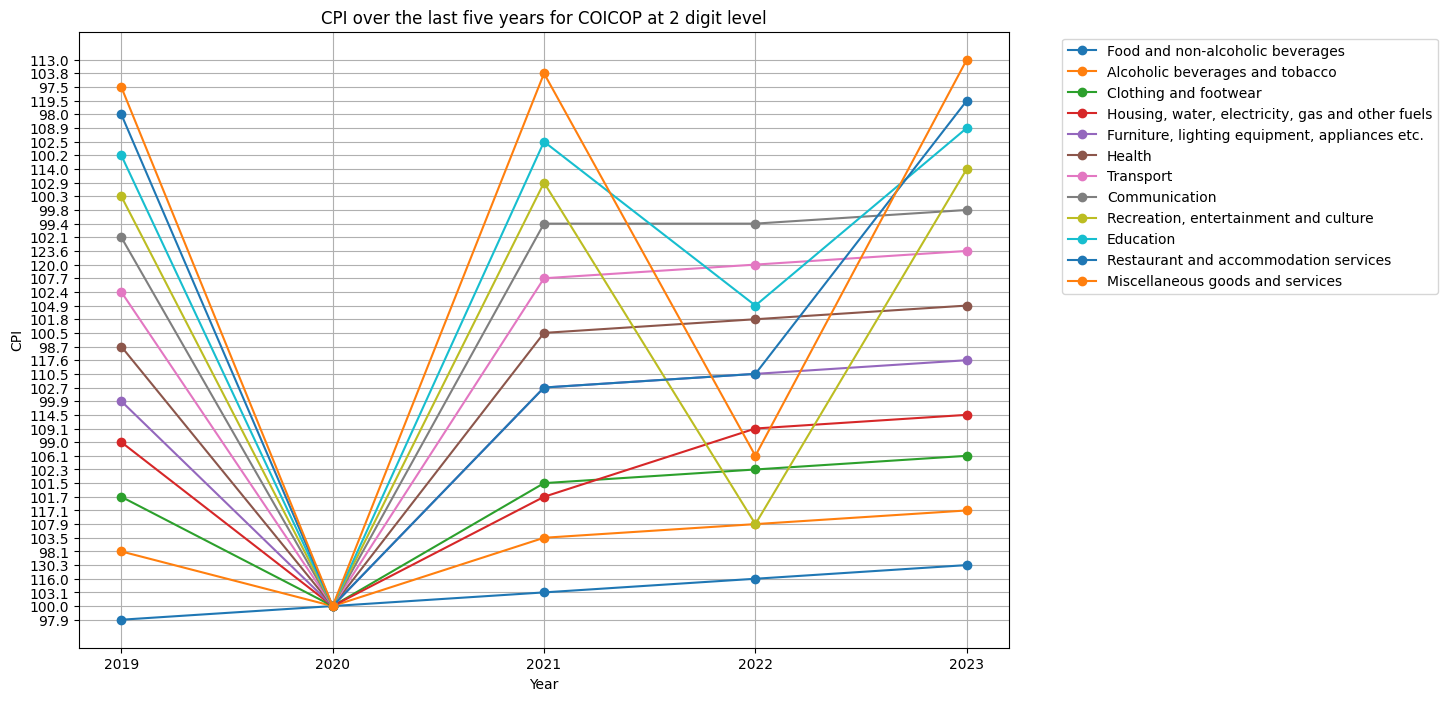

In [6]:
# Filter rows where 'consumption_code' has 2 digits after '-'
df_filtered = df[df["consumption_code"].apply(lambda x: bool(re.search("-\d{2}$", x)))]

# Melt the DataFrame to make it suitable for plotting
df_melted = df_filtered.melt(
    id_vars=["consumption_code", "consumption_label"], var_name="Year", value_name="CPI"
)

# Plotting
plt.figure(figsize=(12, 8))
for label in df_melted["consumption_label"].unique():
    data = df_melted[df_melted["consumption_label"] == label]
    plt.plot(data["Year"], data["CPI"], marker="o", label=label)

plt.xlabel("Year")
plt.ylabel("CPI")
plt.title("CPI over the last five years for COICOP at 2 digit level")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

> ***The line graph provides a comprehensive view of inflation trends across various consumer categories from 2019 to 2023. Given that the dataset contains a total of 441 items, only the COICOP 2 digit level items have been considered to focus on the broader categories. It shows that different categories have experienced varying rates of inflation, with some showing significant increases in CPI while others remain more stable. This dynamic nature of consumer prices is clearly reflected in the graph.***

### 2. For which product (or group of products) CPI has been stable for the last five years?

In [7]:
# Convert columns to numeric
for col in ["2019", "2020", "2021", "2022", "2023"]:
    df[col] = pd.to_numeric(df[col])
# Calculate the standard deviation of the CPI for each product over the years
df["std_dev"] = df[["2019", "2020", "2021", "2022", "2023"]].std(axis=1)

# Sort by standard deviation and take the top 10 products with the lowest standard deviation
df_sorted = df.sort_values(by="std_dev", ascending=True).head(10)
display(df_sorted)

,consumption_code,consumption_label,2019,2020,2021,2022,2023,std_dev
231,CC13-06231,Services of laboratories and radiodiagno...,100.0,100.0,100.0,100.0,100.0,0.000000
225,CC13-0621,Medical services,100.0,100.0,100.0,100.0,100.0,0.000000
226,CC13-06211,Medical services of general medicine,100.0,100.0,100.0,100.0,100.0,0.000000
227,CC13-06212,Medical services of specialists,100.0,100.0,100.0,100.0,100.0,0.000000
224,CC13-062,Outpatient services,100.0,100.0,98.9,99.5,101.0,0.772658
233,CC13-06239,Other non-medical services,99.5,100.0,100.4,100.9,101.9,0.918150
294,CC13-08304,Combined telecommunication services,101.8,100.0,100.7,100.5,102.2,0.923580
278,CC13-08,Communication,102.1,100.0,99.4,99.4,99.8,1.126055
290,CC13-0830,Telecommunication services,101.9,100.0,100.1,98.8,98.9,1.250200
289,CC13-083,Telecommunication services,101.9,100.0,100.1,98.8,98.9,1.250200


### 3. What is the correlation between the CPI for dairy products and the CPI for meat products?

> ***Since the consumption codes are based on COICOP Hierarchy, we first need to find the code for dairy and meat products***

In [8]:
meat = df[df["consumption_label"].str.contains("Meat", case=False, na=False)][
    "consumption_code"
]
dairy = df[df["consumption_label"].str.contains("Dairy", case=False, na=False)][
    "consumption_code"
]

meat_code = meat.iloc[0]
dairy_code = dairy.iloc[0]
print("Meat Products Consumption Code:", meat_code)
print("Dairy Products Consumption Code:", dairy_code)

Meat Products Consumption Code: CC13-0112
Dairy Products Consumption Code: CC13-0114


> ***Dairy products***

In [9]:
# Filter the DataFrame where 'consumption_code' starts with dairy code
dairy_products = df[df["consumption_code"].str.startswith(dairy_code)]
display(dairy_products)

,consumption_code,consumption_label,2019,2020,2021,2022,2023,std_dev
27,CC13-0114,Dairy products and eggs,99.2,100.0,103.9,124.2,143.7,19.384143
28,CC13-01141,Whole milk,96.2,100.0,104.0,124.8,136.3,17.404252
29,CC13-01142,Low fat milk,95.2,100.0,104.8,127.8,142.1,20.088106
30,CC13-01143,Condensed milk,98.2,100.0,103.4,128.9,159.9,26.474459
31,CC13-01144,Yoghurt,100.9,100.0,101.6,117.7,134.9,15.227180
32,CC13-01145,Cheese and curd,99.7,100.0,103.8,124.6,149.1,21.439053
33,CC13-01146,Other dairy products,101.0,100.0,102.7,122.0,141.5,18.106435
34,CC13-01147,Eggs,98.3,100.0,107.2,128.0,136.4,17.222718


> ***Meat products***

In [10]:
# Filter the DataFrame where 'consumption_code' starts with meat code
meat_products = df[df["consumption_code"].str.startswith(meat_code)]
display(meat_products)

,consumption_code,consumption_label,2019,2020,2021,2022,2023,std_dev
11,CC13-0112,Meat and meat products,94.3,100.0,102.8,117.7,127.5,13.711419
12,CC13-01121,Beef and veal,98.6,100.0,103.2,123.0,129.7,14.398264
13,CC13-01122,Pork,91.9,100.0,102.5,119.6,127.9,14.860249
14,CC13-01123,"Lamb, goat meat",99.3,100.0,103.8,119.8,128.9,13.280926
15,CC13-01124,Poultry,98.6,100.0,104.9,128.9,142.5,19.655966
16,CC13-01125,Other meats,99.6,100.0,102.1,106.0,119.4,8.216569
17,CC13-01126,Liver or other edible offal,98.8,100.0,102.0,109.4,117.5,7.851624
18,CC13-01127,Meat products and sausages,92.8,100.0,102.0,113.7,123.8,12.260832
19,CC13-01128,"Other meat, processed and prepared",93.7,100.0,103.0,116.1,126.4,13.205416


> ***To find the correlation, we have to ensure that both DataFrames have the same length***

In [11]:
# ensure that both DataFrames have the same length
if len(dairy_products) > len(meat_products):
    dairy_products = dairy_products.iloc[: len(meat_products)]
elif len(meat_products) > len(dairy_products):
    meat_products = meat_products.iloc[: len(dairy_products)]

> ***Method for calculating correlation. We need to***
> - convert the 'year' column of each DataFrame to a list,
> - skip the first row to take 5 digit products only

In [12]:
def calculate_correlation(year, dairy_products, meat_products):
    # Convert the 'year' column of each DataFrame to a list, skipping the first row
    cpi_dairy = dairy_products[str(year)].tolist()[
        1:
    ]  # Skip the first row to take 5 digit products only
    cpi_meat = meat_products[str(year)].tolist()[
        1:
    ]  # Skip the first row to take 5 digit products only

    # Create a DataFrame
    data = {"CPI_Dairy": cpi_dairy, "CPI_Meat": cpi_meat}
    corr_df = pd.DataFrame(data)

    # Calculate the correlation coefficient
    correlation = corr_df["CPI_Dairy"].corr(corr_df["CPI_Meat"])

    return correlation

> ***Getting Correlation for each year to visualize***

In [13]:
years = [2023, 2022, 2021, 2019]
correlation_list = [
    calculate_correlation(year, dairy_products, meat_products) for year in years
]
correlation = {"Year": years, "Correlation": correlation_list}

In [14]:
corr_df = pd.DataFrame(correlation)
display(corr_df)

,Year,Correlation
0,2023,-0.277823
1,2022,-0.275818
2,2021,-0.615366
3,2019,0.567303


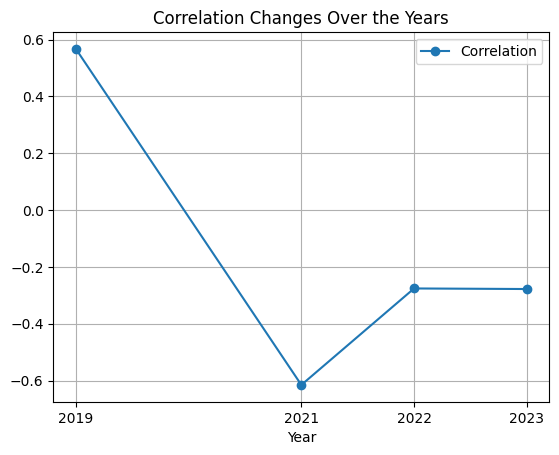

In [15]:
corr_df.plot(x="Year", y="Correlation", kind="line", marker="o", grid=True)

# Adjusting the x-ticks to only include the years in the DataFrame
plt.xticks(corr_df["Year"].unique())

plt.title("Correlation Changes Over the Years")
plt.show()

> #### Correlation Analysis of CPI for Dairy and Meat Products

- **2023 and 2022**: For these years, the correlation values are closer to 0 and are negative, indicating a weak negative correlation. This suggests that, generally but not always, when the Consumer Price Index (CPI) for dairy products increases, the CPI for meat products tends to decrease slightly, and vice versa. However, the correlation is weak, implying that the relationship isn't very strong or consistent.

- **2021**: In contrast, for the year 2021, the correlation is also negative but not close to 0, representing a moderate relationship between the CPI for dairy and meat products. This suggests a stronger tendency for the CPI of meat products to decrease as the CPI for dairy products increases, and vice versa.

- **2019**: On the other hand, the year 2019 shows a positive correlation between the products, which means that as the CPI for dairy products increases, the CPI for meat products also tends to increase moderately, and vice versa.

- **2020**: The year 2020 was skipped because it is used as the baseline where the CPI for all products is set to 100. This is a common practice in index calculations to set a specific year as the base year, which serves as a reference point for comparing changes in the index over time.


### 4. For which product (or group of products) CPI has been increased and decreased the most?

In [16]:
# Calculate the CPI increase from 2019 to 2023
df["CPI_increase"] = df["2023"] - df["2019"]

> #### Top 5 products with the maximum increase in CPI from 2019 to 2023

In [17]:
# Sort the DataFrame by CPI_increase in descending order and get the top 5 products
top_5_increase_products = df.sort_values("CPI_increase", ascending=False).head(5)
display(
    top_5_increase_products[["consumption_code", "consumption_label", "CPI_increase"]]
)

,consumption_code,consumption_label,CPI_increase
121,CC13-042,Imputed net rent,104.7
123,CC13-04210,Imputed net rent,104.7
122,CC13-0421,Imputed net rent,104.7
288,CC13-08204,Repair of telephones,101.6
153,CC13-04541,Coal briquettes,97.5


> #### Top 5 products with the maximum decrease in CPI from 2019 to 2023

In [18]:
# Sort the DataFrame by CPI_increase in ascending order and get the top 5 products
top_5_decrease_products = df.sort_values("CPI_increase", ascending=True).head(5)
display(
    top_5_decrease_products[["consumption_code", "consumption_label", "CPI_increase"]]
)

,consumption_code,consumption_label,CPI_increase
266,CC13-07321,Ticket for long-distance coach,-104.2
267,CC13-07322,Taxi ride and car pools,-97.0
264,CC13-07311,Train ticket,-18.7
263,CC13-0731,Passenger transport by railway,-18.7
299,CC13-09112,"TV set, satellite kit or the like",-15.8


### 5. Can we predict future trends in item prices based on historical CPI data?

> ***Yes, we can forecast future trends in item prices using historical CPI data. Various machine learning techniques, such as Time Series Decomposition, ARIMA and linear regression, can be employed for this purpose. Here, we are presenting the application of the linear regression method. This approach allows us to establish a relationship between the dependent variable (item prices) and the independent variable (time), thereby enabling us to predict future price trends.***

In [19]:
# Initialize model
cpi_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables which is year 2019, 2021 and 2022
predictors = pd.DataFrame({"2019": df["2019"], "2021": df["2021"], "2022": df["2022"]})

# Train the model using the previous CPI data to get CPI data for 2023
cpi_model.fit(X=predictors, y=df["2023"])

print("Model intercept: ", cpi_model.intercept_)
print("Model Coefficients: ", cpi_model.coef_)

preds = cpi_model.predict(X=predictors)
print("RMSE: ", mean_squared_error(preds, df["2023"]) ** 0.5)

Model intercept:  22.208571124976487
Model Coefficients:  [-0.0452132  -0.20392232  1.09720263]
RMSE:  8.527899353059183


> #### Regression Analysis for predicting CPI for 2023


- **Model Intercept (22.208571124976487)**: This is the baseline value of the dependent variable when all predictors are zero. Ithisur model, if all predictors are zero, the predicted value would be approximately 22.21. 

- **Model Coefficients ([-0.0452132  -0.20392232  1.09720263])**: These values represent the change in the dependent variable for each one-unit change in the corresponding predictor, assuming all other predictors are held constant.thisyour model:
    - The first predictor decreases the dependent variable by approximately 0.045 units for each unit increase in its value.
    - The second predictor decreases the dependent variable by approximately 0.204 units for each unit increase in its value.
    - The third predictor increases the dependent variable by approximately 1.097 units for each unit increase in its
v alue.

- **RMSE (8.527899353059183)**: The Root Mean Square Error (RMSE) measures the average error performed by the model in predicting the outcome for an observation. Lower values of RMSE indicate better fit of the this. In your model, the average prediction error is approximately 8.53 units. This means that on average, the model's predictions are about 8.53 units away from the actual  values.

These values provide a quantitative theure of your model's performance and the relationships it has identified between the predictors and the outcomh question.

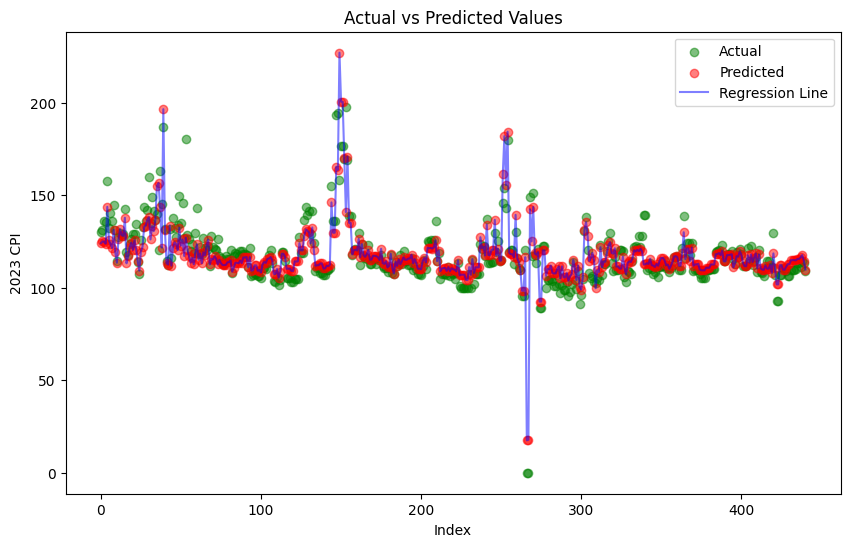

In [20]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the actual values
plt.scatter(df.index, df["2023"], color="green", label="Actual", alpha=0.5)

# Plot the predicted values
plt.scatter(df.index, preds, color="red", label="Predicted", alpha=0.5)

# Add the regression line
plt.plot(df.index, preds, color="blue", label="Regression Line", alpha=0.5)


plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("2023 CPI")
plt.legend()
plt.show()

> #### Plot Analysis

The scatter plot graph compares actual CPI values to predicted values for the year 2023. It features:
- **Actual Values**: Green dots representing the actual CPI data.
- **Predicted Values**: Red dots indicating the model's predictions.
- **Regression Line**: A blue line showing the linear relationship the model has found.

***The graph reveals how the model's predictions compare to the actual data, with the regression line suggesting a linear trend. However, the practicality of the model might be questionable if it uses predicted values that have already been factored into the model's fit. This could lead to overfitting, where the model appears accurate for the known data but may fail to generalize to new, unseen data. Overfitting can falsely inflate the model's predictive accuracy by incorporating information that wouldn't be available in a real-world prediction scenario.***

## Result Summary

- **Price Evolution**
  The dataset shows how item prices have changed from 2019 to 2023, with a focus on broader categories at the COICOP 2-digit level.

- **Stable CPI Products**
  Medical services, particularly laboratory and radiodiagnostic services, have maintained a stable Consumer Price Index (CPI) over the last five years.

- **CPI Correlation**
  The correlation between the CPI for dairy and meat products varies by year, with 2021 showing a moderate negative correlation and 2019 showing a positive correlation.

- **CPI Changes**
  The most significant CPI increases and decreases from 2019 to 2023 are identified, with imputed net rent experiencing the largest increase and long-distance coach tickets the largest decrease.

**Conclusion:**
The analysis provides insights into inflation trends and consumption behaviors in Germany. It highlights the dynamic nature of consumer prices and the potential for using historical CPI data to predict future price trends. The linear regression model used suggests a predictive relationship between time and item prices, although the practicality of the model needs careful consideration to avoid overfitting. Overall, the dataset is a valuable resource for understanding economic patterns in Germany.